In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [4]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\autos.csv", encoding = 'ISO-8859-1')

In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
#ANALYSIS - 1

In [4]:
#1)  Perform general Data analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [6]:
data['dateCrawled']=pd.to_datetime(data['dateCrawled'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [5]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [ ]:
#2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

In [39]:
data["yearOfRegistration"] = data["yearOfRegistration"].where((data["yearOfRegistration"] >= 1950) & (data["yearOfRegistration"]
<= 2023),data["yearOfRegistration"].mode()[0])

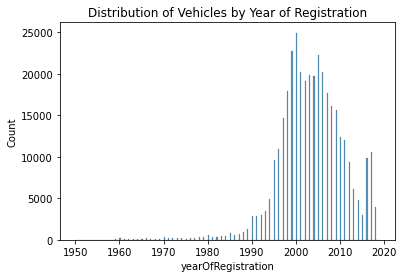

In [117]:
sns.histplot(data=data,x=data['yearOfRegistration'])
plt.title("Distribution of Vehicles by Year of Registration")
plt.show()

In [ ]:
#3) Create a plot based on the Variation of the price range by the vehicle type.

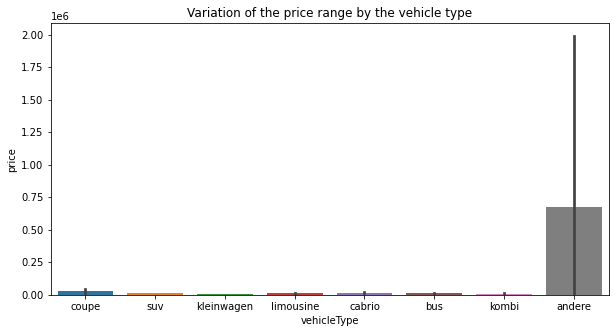

In [119]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='price',x='vehicleType')
plt.title('Variation of the price range by the vehicle type')
plt.show()

In [ ]:
#4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [43]:
data['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

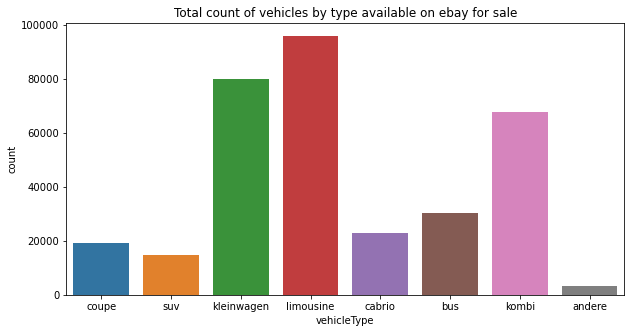

In [120]:
plt.figure(figsize=(10,5))
sns.countplot(x=data["vehicleType"])
plt.title('Total count of vehicles by type available on ebay for sale')
plt.show()

In [ ]:
#5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [115]:
data[['price','kilometer']]

,price,kilometer
0,480,150000
1,18300,125000
2,9800,125000
3,1500,150000
4,3600,90000
...,...,...
371523,2200,20000
371524,1199,125000
371525,9200,150000
371526,3400,150000


In [116]:
data[['price','kilometer']].corr(method='spearman')

,price,kilometer
price,1.000000,-0.373047
kilometer,-0.373047,1.000000


In [ ]:
#ANALYSIS - 2

In [ ]:
#1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

In [6]:
data['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

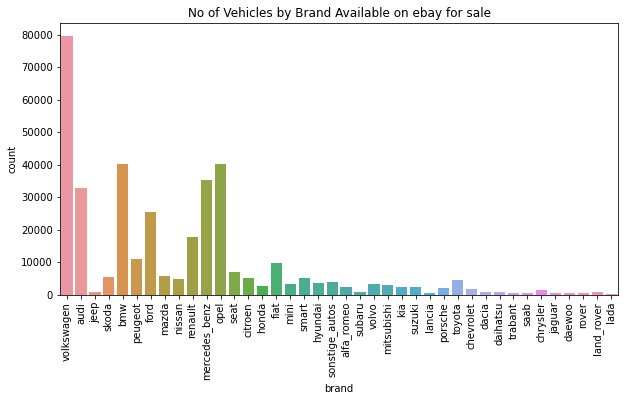

In [121]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['brand'])
plt.xticks(rotation=90)
plt.title('No of Vehicles by Brand Available on ebay for sale')
plt.show()

In [ ]:
#2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both
# numerical and visualization analysis

In [9]:
ave_price=pd.pivot_table(data=data,index='gearbox',columns='vehicleType',values='price')

In [10]:
ave_price

vehicleType,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
gearbox,,,,,,,,
automatik,7366.861496,10599.265713,16254.374208,35500.199567,3889.552200,8910.045892,19004.102243,16764.091774
manuell,825539.352000,6321.168265,14897.823880,12400.255031,4606.752785,7464.627711,8505.151711,10040.553599


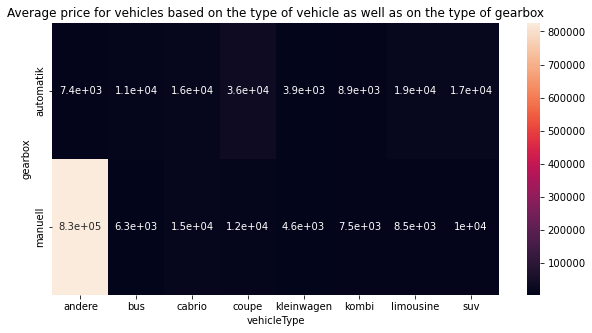

In [11]:
plt.figure(figsize=(10,5))
plt.title('Average price for vehicles based on the type of vehicle as well as on the type of gearbox')
sns.heatmap(ave_price,annot=True)
plt.show()

<AxesSubplot:xlabel='gearbox'>

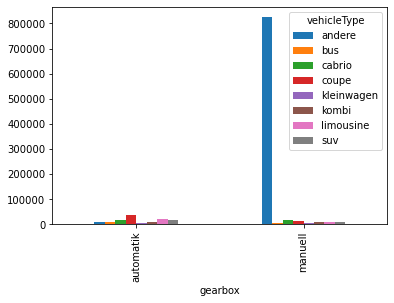

In [105]:
ave_price.plot(kind='bar')

In [ ]:
#3) What is the marginal probability of private seller

In [71]:
data['seller'].valueSZ_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [72]:
data['seller'].value_counts(normalize='True')

privat        0.999992
gewerblich    0.000008
Name: seller, dtype: float64

In [ ]:
#ANALYSIS - 3

In [106]:
#1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

In [ ]:
#2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot

In [13]:
avg_price1=pd.pivot_table(data=data,index='gearbox',columns='fuelType',values='price')

In [14]:
avg_price1

fuelType,andere,benzin,cng,diesel,elektro,hybrid,lpg
gearbox,,,,,,,
automatik,8.434172e+03,12248.641902,6737.717949,18810.346082,22900.278481,15281.959821,22195.988131
manuell,1.732090e+07,6567.120928,4572.038610,7326.258643,3384.615385,12013.695652,3255.393168


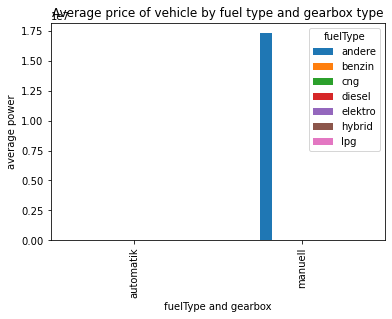

In [15]:
avg_price1.plot(kind='bar')
plt.title('Average price of vehicle by fuel type and gearbox type')
plt.xlabel('fuelType and gearbox')
plt.ylabel('average power')
plt.show()

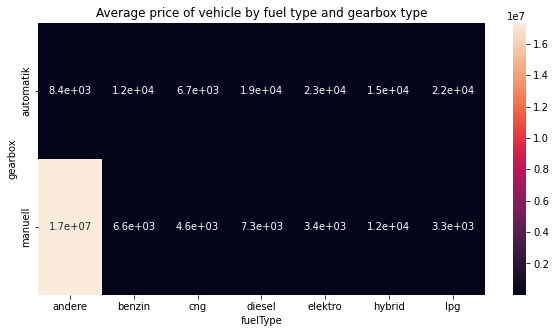

In [131]:
plt.figure(figsize=(10,5))
plt.title('Average price of vehicle by fuel type and gearbox type')
sns.heatmap(avg_price,annot=True)
plt.show()

In [ ]:
#3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

In [134]:
avg_power=pd.pivot_table(data=data,index='vehicleType',columns='gearbox',values='powerPS')

In [136]:
avg_power

gearbox,automatik,manuell
vehicleType,,
andere,124.922438,100.026545
bus,140.884166,110.328334
cabrio,188.922414,133.495202
coupe,218.719307,154.581977
kleinwagen,75.040381,69.628203
kombi,174.859625,125.261023
limousine,182.454155,117.023218
suv,210.521964,127.734295


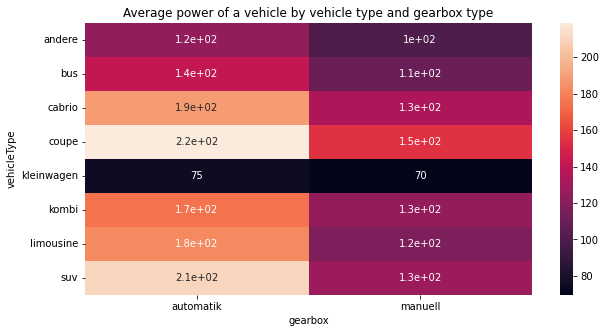

In [139]:
plt.figure(figsize=(10,5))
plt.title('Average power of a vehicle by vehicle type and gearbox type')
sns.heatmap(avg_power,annot=True)
plt.show()

<Figure size 1080x720 with 0 Axes>

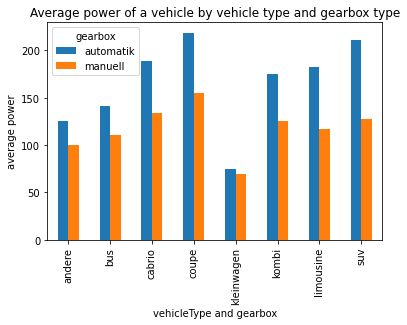

In [149]:
plt.figure(figsize=(15,10))
avg_power.plot(kind='bar')
plt.title('Average power of a vehicle by vehicle type and gearbox type')
plt.xlabel('vehicleType and gearbox')
plt.ylabel('average power')
plt.show()

In [ ]:
#4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this.

In [142]:
avg_price2=pd.pivot_table(data=data,index='brand',columns='vehicleType',values='price')

In [145]:
avg_price2

vehicleType,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,
alfa_romeo,3.153333e+03,NaN,9147.179487,6897.190083,4466.242678,3580.161926,3067.774841,0.000000
audi,9.768120e+04,3485.000000,13441.196564,16341.915486,7358.435834,17069.568857,16238.554551,24599.234542
bmw,2.686439e+03,27569.884615,38010.594552,32097.647113,4432.658696,9001.496376,9613.617946,15924.963470
chevrolet,1.003280e+04,6189.300000,24026.621622,16317.023438,3029.557461,4899.090090,5452.099567,9830.491228
chrysler,8.888333e+03,2630.515982,4324.531120,9174.240000,3124.833333,4867.845528,4173.444444,5888.391304
citroen,3.521024e+03,4409.132179,4536.408696,2695.552632,3029.278894,3724.929022,41831.889959,10810.540541
dacia,4.450000e+03,8606.700000,NaN,NaN,4878.726457,4166.642857,3359.990291,9761.972093
daewoo,9.938000e+02,1262.777778,900.000000,428.625000,1110.324627,816.340426,983.981308,1900.000000
daihatsu,1.075000e+03,1201.500000,7761.000000,NaN,1449.787476,3420.294118,3532.106383,2066.918367


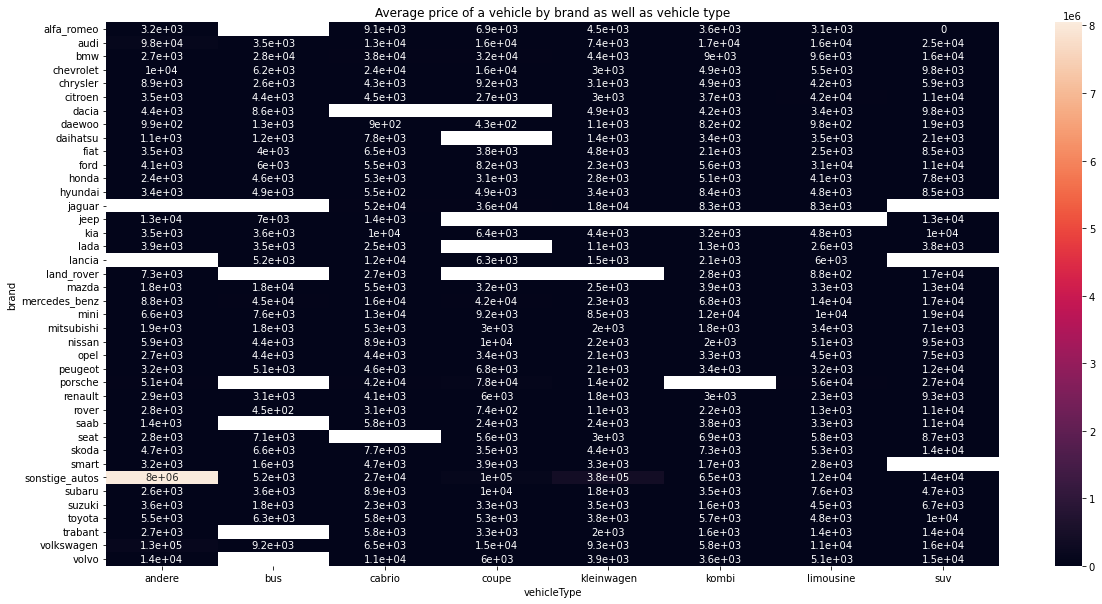

In [148]:
plt.figure(figsize=(20,10))
plt.title('Average price of a vehicle by brand as well as vehicle type')
sns.heatmap(avg_price2,annot=True)
plt.show()